In [198]:
# Basic Libraries
import re
import os
import pickle
import joblib
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

# NLP and ML
import string
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Accuracy and testing
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Analysis and Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [199]:
# Read and drop null values
data = pd.read_csv('/content/Feedback1.csv')

data.head(2)

Timestamp              EmailAddress CDACBatch Course Centre  \
0  10/14/2024 20:06  madhulikaayare@gmail.com       NaN    NaN    NaN   
1  10/14/2024 20:09    swayam122333@gmail.com       NaN    NaN    NaN   

                               CDAC Awareness Opinion Suitable  \
0  Through friend or family members       Yes     NaN      Yes   
1  Through friend or family members        No     NaN      Yes   

                         Strengths Suggestions  \
0  Deep understanding of concepts   Very good    
1       It is a government course.          No   

                                     CompanyFeedback Inputs   Offering  \
0                                                 Na     Na  Very good   
1  company did not visit till date as my course s...     No  Very good   

                                       SupportFuture Feedback  
0  By guiding them and helping them with every po...       No  
1  By guiding them about the courser and the outc...       No

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        2106 non-null   object
 1   EmailAddress     2106 non-null   object
 2   CDACBatch        2058 non-null   object
 3   Course           2052 non-null   object
 4   Centre           2052 non-null   object
 5   CDAC             2106 non-null   object
 6   Awareness        2106 non-null   object
 7   Opinion          1970 non-null   object
 8   Suitable         1683 non-null   object
 9   Strengths        2047 non-null   object
 10  Suggestions      1981 non-null   object
 11  CompanyFeedback  1311 non-null   object
 12  Inputs           1896 non-null   object
 13  Offering         2106 non-null   object
 14  SupportFuture    2051 non-null   object
 15  Feedback         1925 non-null   object
dtypes: object(16)
memory usage: 263.4+ KB


In [201]:
data.columns


Index(['Timestamp', 'EmailAddress', 'CDACBatch', 'Course', 'Centre', 'CDAC',
       'Awareness', 'Opinion', 'Suitable', 'Strengths', 'Suggestions',
       'CompanyFeedback', 'Inputs', 'Offering', 'SupportFuture', 'Feedback'],
      dtype='object')

In [202]:
original_columns = data.columns.tolist()
data.dropna(how="any", inplace=True)
selected_columns = original_columns[:5]
data = data[selected_columns]
data.head()

Timestamp               EmailAddress CDACBatch   Course  \
54  10/23/2024 10:59       ritam28315@gmail.com    Mar-23   PG-DAC   
55  10/23/2024 19:49  shubhamrockmail@gmail.com    Mar-23   PG-DAC   
56  10/23/2024 19:49     a.sincyphers@gmail.com    Mar-23   PG-DAC   
57  10/23/2024 19:51   ramie93roshini@gmail.com    Mar-24  PG-DBDA   
58  10/23/2024 20:11  neethuvikas6780@gmail.com    Sep-23  PG-DBDA   

                      Centre  
54  C-DAC Thiruvananthapuram  
55             C-DAC Chennai  
56             C-DAC Chennai  
57             C-DAC Chennai  
58             C-DAC Chennai

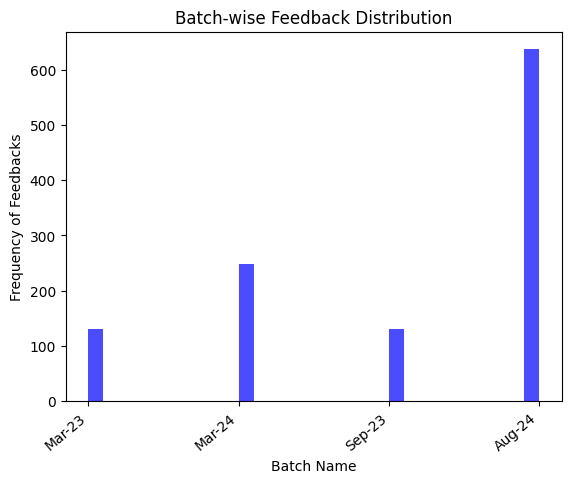

In [203]:
plt.hist(data['CDACBatch'], bins=30, color='blue', alpha=0.7)
plt.title('Batch-wise Feedback Distribution')
plt.xlabel('Batch Name')
plt.ylabel('Frequency of Feedbacks')
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels by 40 degrees
plt.show()

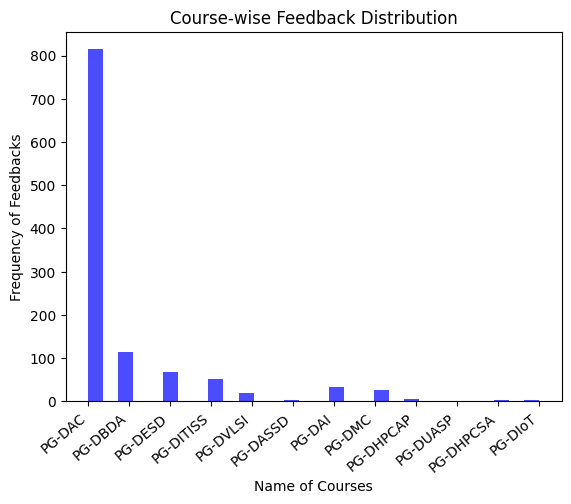

In [204]:
plt.hist(data['Course'], bins=30, color='blue', alpha=0.7)
plt.title('Course-wise Feedback Distribution')
plt.xlabel('Name of Courses')
plt.ylabel('Frequency of Feedbacks')
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels by 40 degrees
plt.show()

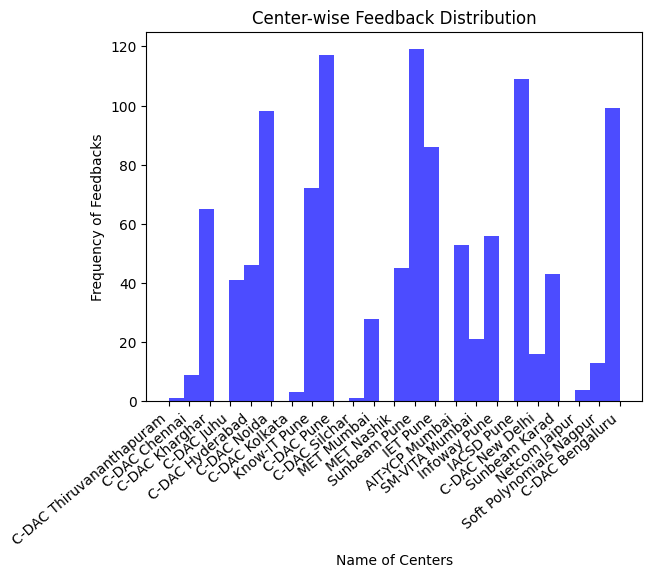

In [205]:
plt.hist(data['Centre'], bins=30, color='blue', alpha=0.7)
plt.title('Center-wise Feedback Distribution')
plt.xlabel('Name of Centers')
plt.ylabel('Frequency of Feedbacks')
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels by 40 degrees
plt.show()

In [206]:
print("The size of the data is:", data.shape)

The size of the data is: (1145, 5)


In [207]:
#Data Cleaning
print(data.isnull().sum())
print(f"Number of duplicates: {data.duplicated().sum()}")


Timestamp       0
EmailAddress    0
CDACBatch       0
Course          0
Centre          0
dtype: int64
Number of duplicates: 0


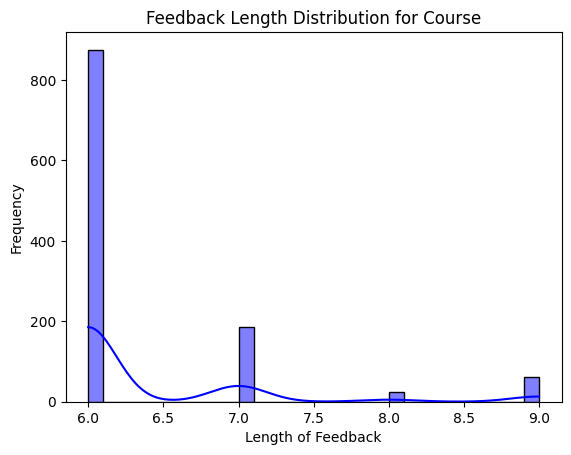

In [208]:
#Text Exploration
feedback_column = 'Course'
data['Feedback_Length'] = data[feedback_column].str.len()
if feedback_column not in data.columns:
    raise KeyError(f"Column '{feedback_column}' not found in the dataset.")

sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution for Course')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

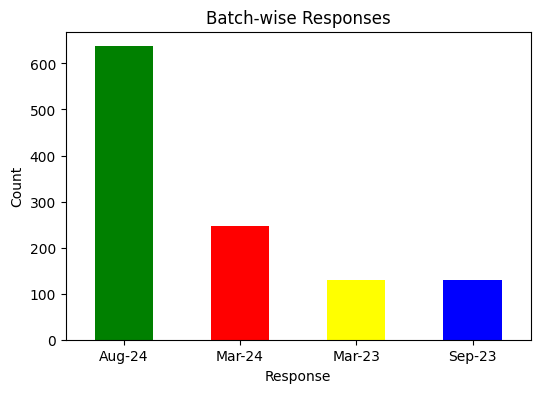

In [209]:

response_counts = data['CDACBatch'].value_counts()

#  Plot the bar graph
plt.figure(figsize=(6, 4))
response_counts.plot(kind='bar', color=['green', 'red','Yellow','blue'])

# Adding labels and title
plt.title('Batch-wise Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Show the plot
plt.show()




In [210]:
#Create a list of most frequently occurring words
from collections import Counter

# Assuming the column name is actually 'Course'
words = " ".join(data['Course']).split()
# Or if there's another relevant text column, replace 'Course'

most_common_words = Counter(words).most_common(20)
print(most_common_words)

[('PG-DAC', 814), ('PG-DBDA', 115), ('PG-DESD', 67), ('PG-DITISS', 53), ('PG-DAI', 34), ('PG-DMC', 27), ('PG-DVLSI', 19), ('PG-DHPCAP', 5), ('PG-DASSD', 4), ('PG-DHPCSA', 3), ('PG-DIoT', 3), ('PG-DUASP', 1)]


In [211]:
#N-grams Analysis (e.g., most frequent word pairs):
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
ngrams = vectorizer.fit_transform(data['Course'])
print(vectorizer.get_feature_names_out())


['pg dac' 'pg dai' 'pg dassd' 'pg dbda' 'pg desd' 'pg dhpcap' 'pg dhpcsa'
 'pg diot' 'pg ditiss' 'pg dmc' 'pg duasp' 'pg dvlsi']


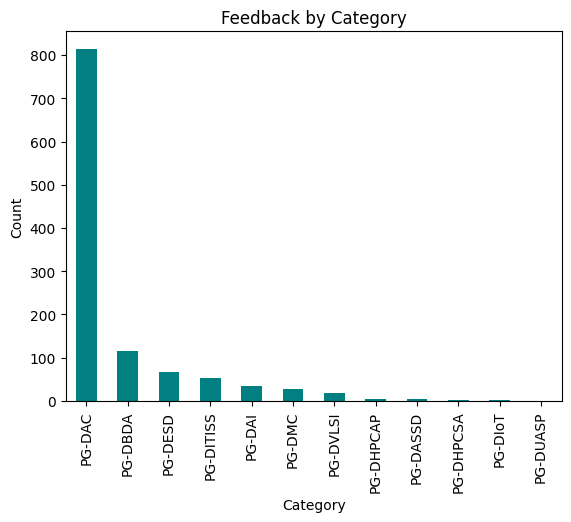

In [212]:
data['Course'].value_counts().plot(kind='bar', color='teal')
plt.title('Feedback by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


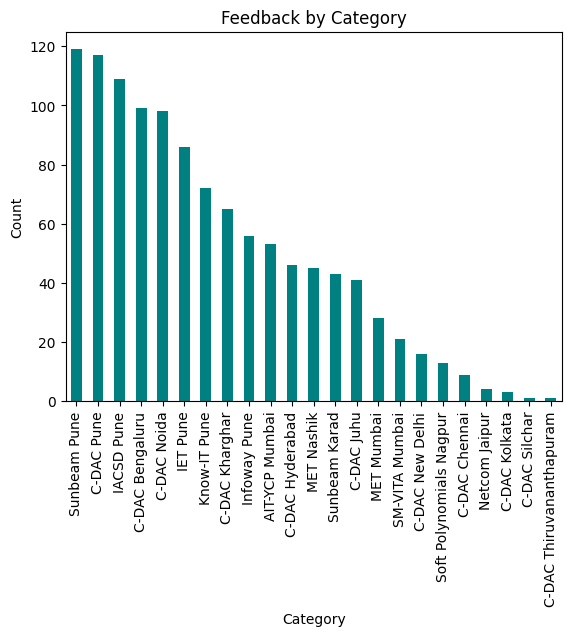

In [213]:
data['Centre'].value_counts().plot(kind='bar', color='teal')
plt.title('Feedback by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

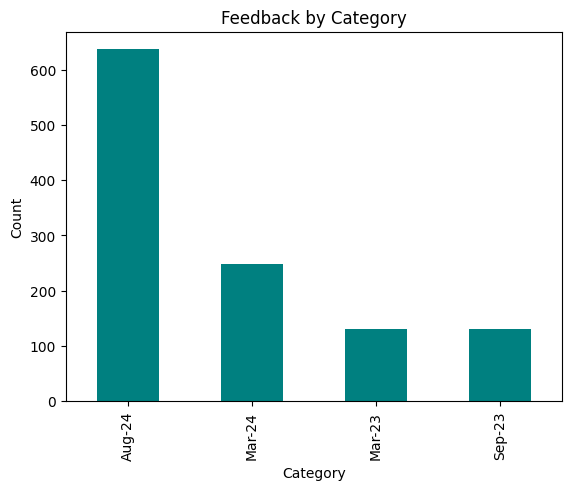

In [214]:
data['CDACBatch'].value_counts().plot(kind='bar', color='teal')
plt.title('Feedback by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Text** **Analysis**

In [223]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [224]:
# Read and drop null values
data = pd.read_csv('/content/Feedback1.csv')
data.head(2)

Timestamp              EmailAddress CDACBatch Course Centre  \
0  10/14/2024 20:06  madhulikaayare@gmail.com       NaN    NaN    NaN   
1  10/14/2024 20:09    swayam122333@gmail.com       NaN    NaN    NaN   

                               CDAC Awareness Opinion Suitable  \
0  Through friend or family members       Yes     NaN      Yes   
1  Through friend or family members        No     NaN      Yes   

                         Strengths Suggestions  \
0  Deep understanding of concepts   Very good    
1       It is a government course.          No   

                                     CompanyFeedback Inputs   Offering  \
0                                                 Na     Na  Very good   
1  company did not visit till date as my course s...     No  Very good   

                                       SupportFuture Feedback  
0  By guiding them and helping them with every po...       No  
1  By guiding them about the courser and the outc...       No

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        2106 non-null   object
 1   EmailAddress     2106 non-null   object
 2   CDACBatch        2058 non-null   object
 3   Course           2052 non-null   object
 4   Centre           2052 non-null   object
 5   CDAC             2106 non-null   object
 6   Awareness        2106 non-null   object
 7   Opinion          1970 non-null   object
 8   Suitable         1683 non-null   object
 9   Strengths        2047 non-null   object
 10  Suggestions      1981 non-null   object
 11  CompanyFeedback  1311 non-null   object
 12  Inputs           1896 non-null   object
 13  Offering         2106 non-null   object
 14  SupportFuture    2051 non-null   object
 15  Feedback         1925 non-null   object
dtypes: object(16)
memory usage: 263.4+ KB


In [226]:
data.columns

Index(['Timestamp', 'EmailAddress', 'CDACBatch', 'Course', 'Centre', 'CDAC',
       'Awareness', 'Opinion', 'Suitable', 'Strengths', 'Suggestions',
       'CompanyFeedback', 'Inputs', 'Offering', 'SupportFuture', 'Feedback'],
      dtype='object')

**Text** **Preprocessing**

In [229]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Opinion Column : In your opinion, how can we improve the awareness of C-DAC courses in your region/district?**

  Opinion Cleaned_Feedback
0     NaN              nan
1     NaN              nan
2     NaN              nan
3     NaN              nan
4     NaN              nan
Sentiment
Neutral     1432
Positive     607
Negative      67
Name: count, dtype: int64


<ipython-input-252-55071a052470>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


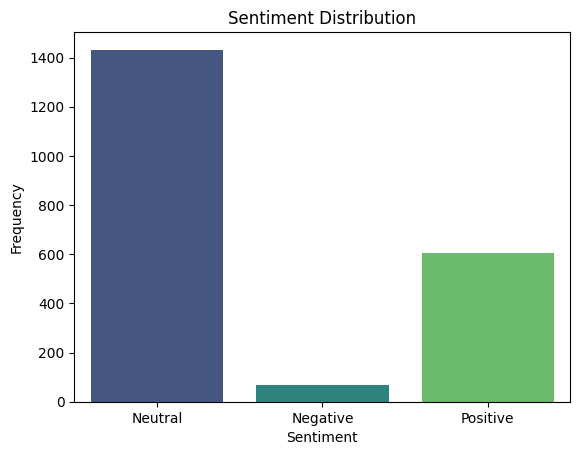

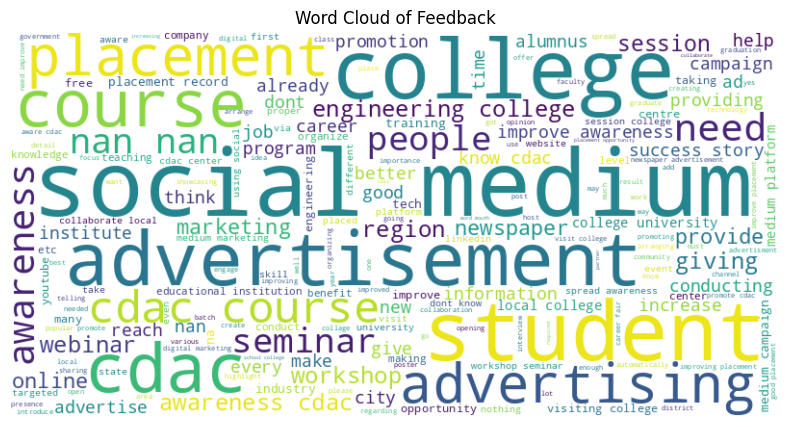

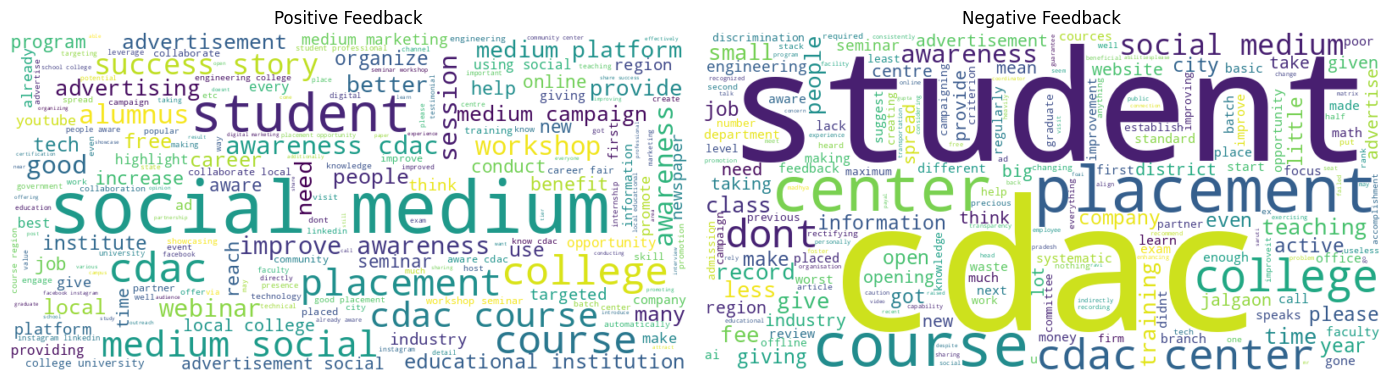

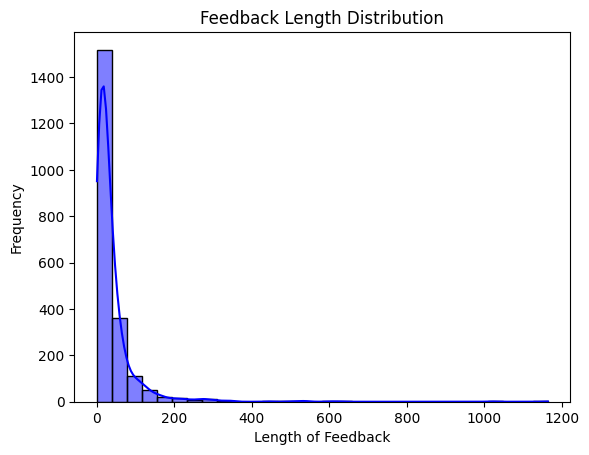

<ipython-input-252-55071a052470>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


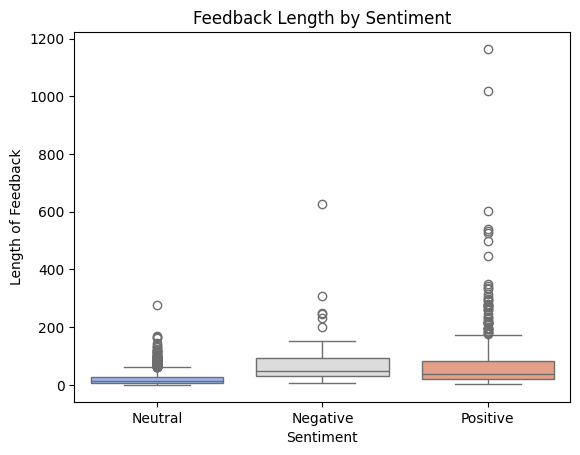

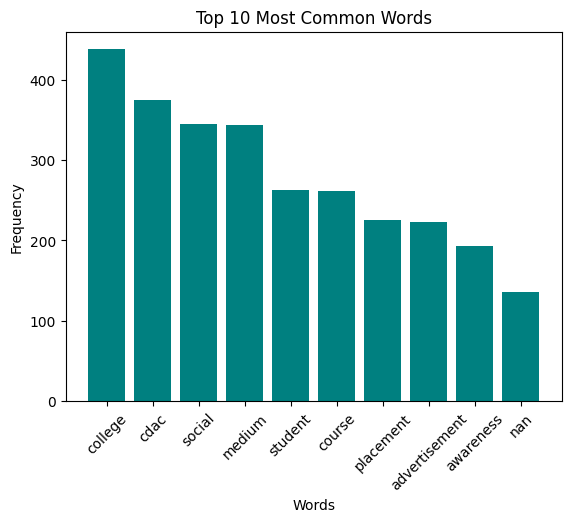

In [252]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Opinion'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Opinion', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Strengths Column : What do you think are the USPs (Strengths) of C-DAC courses when compared to other courses offered?**

In [ ]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Strengths'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Strengths', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Suggestions Column : Do you have any suggestions towards currently offered C-DAC courses and its content?**

                                         Suggestions  \
0                                         Very good    
1                                                 No   
2          Please Bring more company for placements    
3  Please conduct offline courses in cyber security    
4                Make course more practical oriented   

                               Cleaned_Feedback  
0                                          good  
1                                                
2                please bring company placement  
3  please conduct offline course cyber security  
4                make course practical oriented  
Sentiment
Neutral     1528
Positive     443
Negative     135
Name: count, dtype: int64


<ipython-input-251-ccebd32e33ff>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


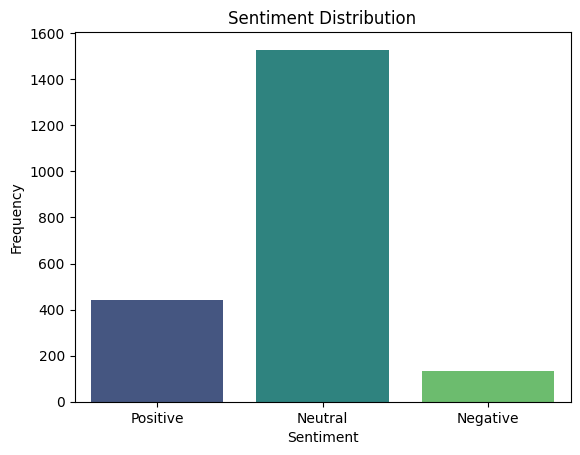

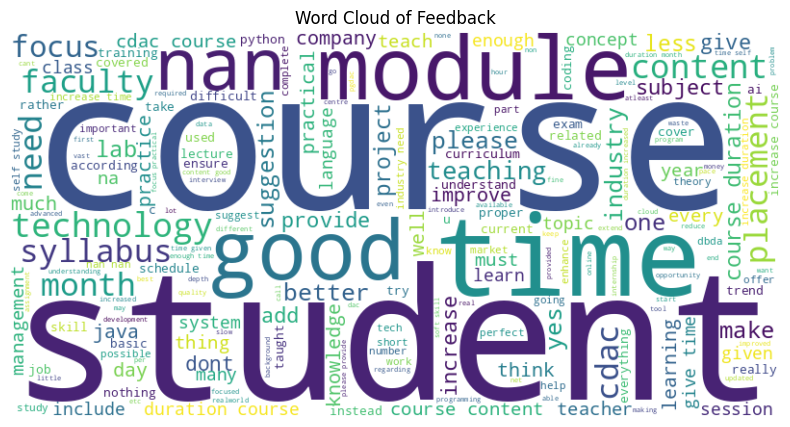

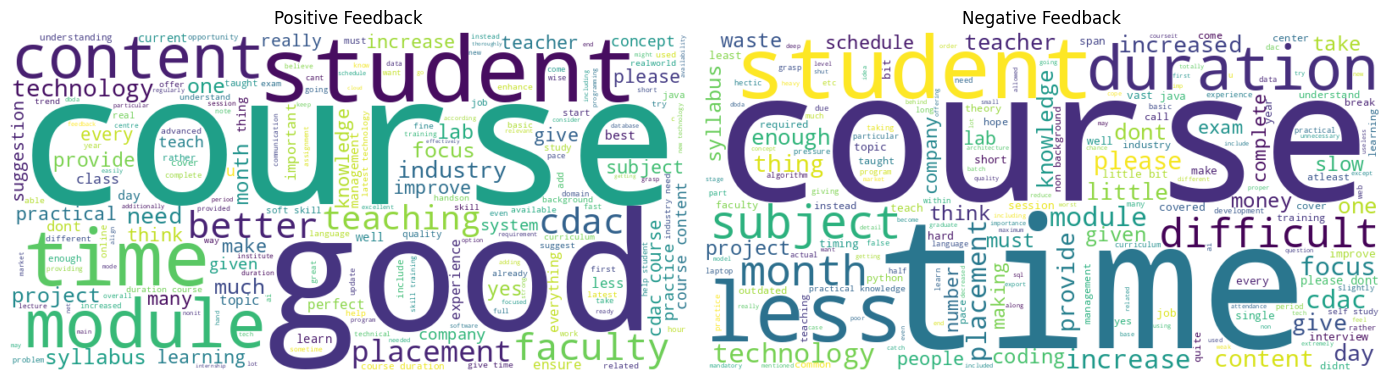

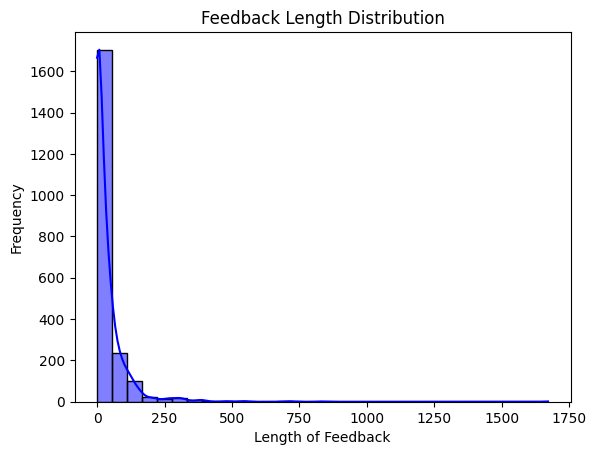

<ipython-input-251-ccebd32e33ff>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


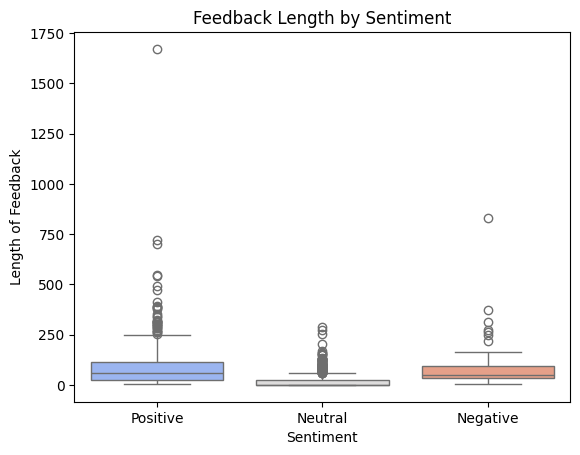

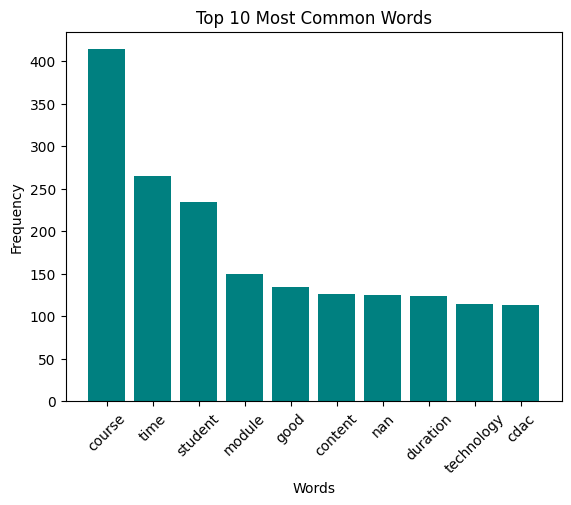

In [251]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Suggestions'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Suggestions', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**CompanyFeedback Column : Do you have any feedback about the companies visiting the campus? (Not applicable for the August 2024 batch students)**

                                     CompanyFeedback  \
0                                                 Na   
1  company did not visit till date as my course s...   
2  Its offering very low package this was not exp...   
3       Yes, Companies are coming with less package    
4                  Very less companies are visiting    

                                  Cleaned_Feedback  
0                                               na  
1  company visit till date course started recently  
2               offering low package expected cdac  
3                  yes company coming less package  
4                            less company visiting  
Sentiment
Neutral     1767
Positive     250
Negative      89
Name: count, dtype: int64


<ipython-input-250-263130269fc8>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


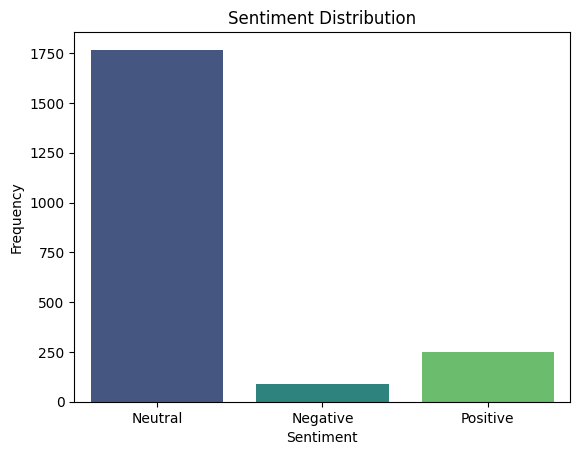

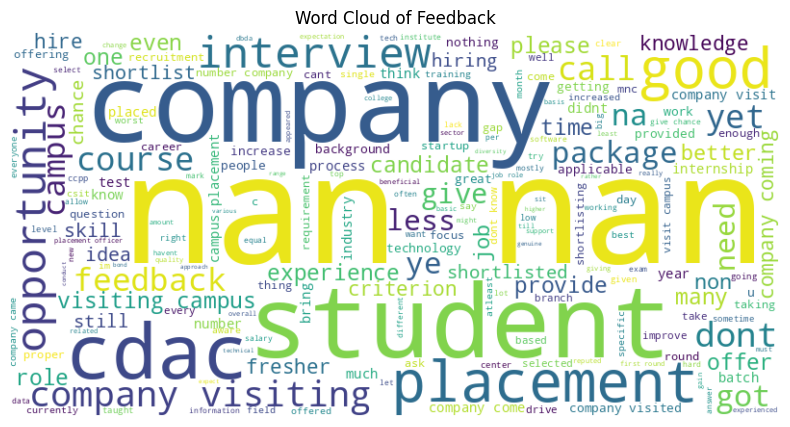

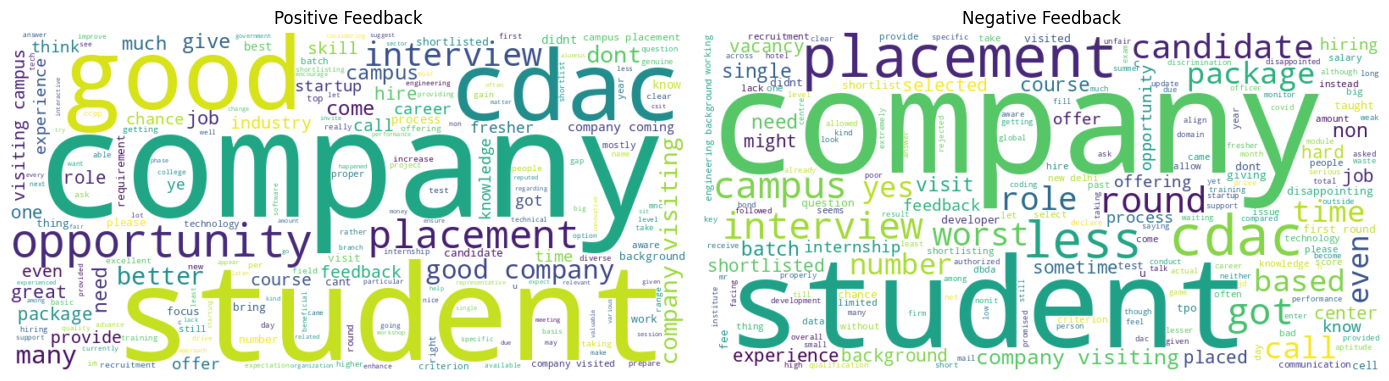

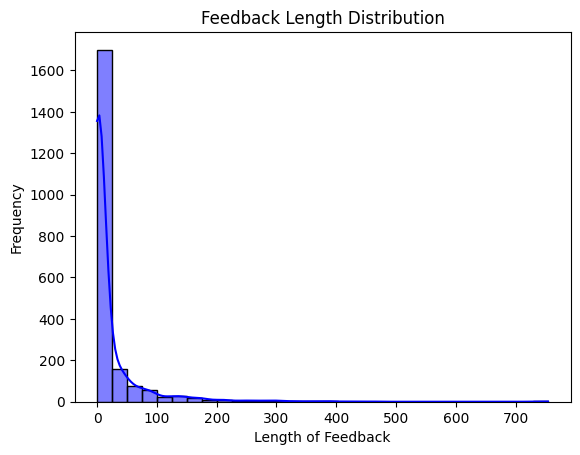

<ipython-input-250-263130269fc8>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


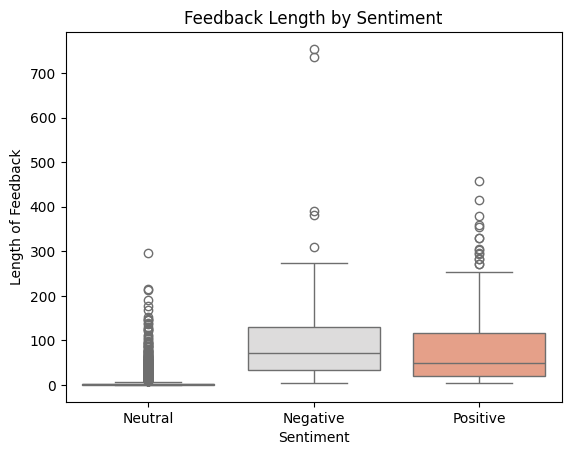

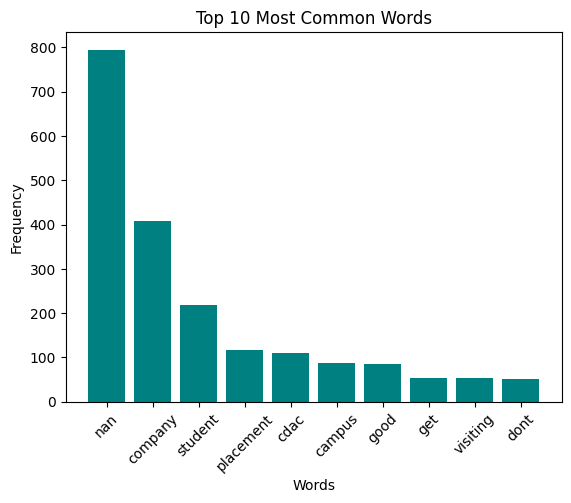

In [250]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['CompanyFeedback'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['CompanyFeedback', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Inputs Column : Do you have any inputs related to admission process, centre & course allocation for C-DAC courses?**

  Inputs Cleaned_Feedback
0     Na               na
1     No                 
2     No                 
3     No                 
4     No                 
Sentiment
Neutral     1745
Positive     288
Negative      73
Name: count, dtype: int64


<ipython-input-249-b2e890723b2f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


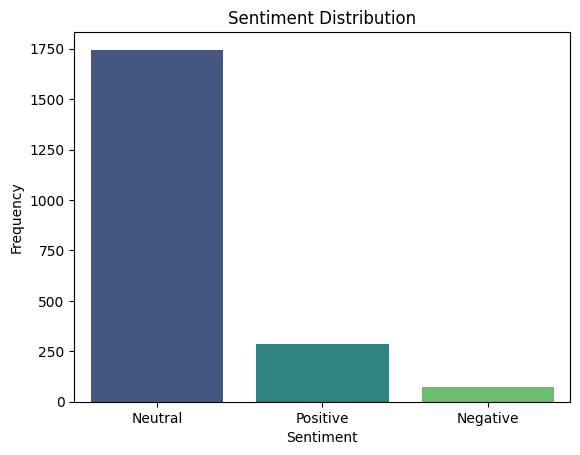

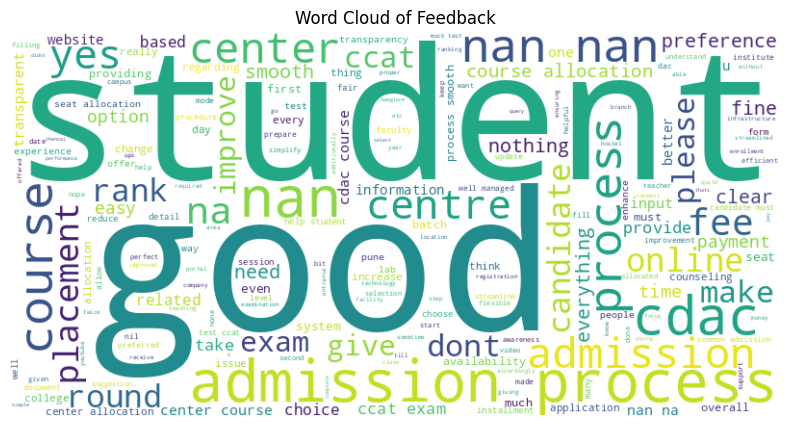

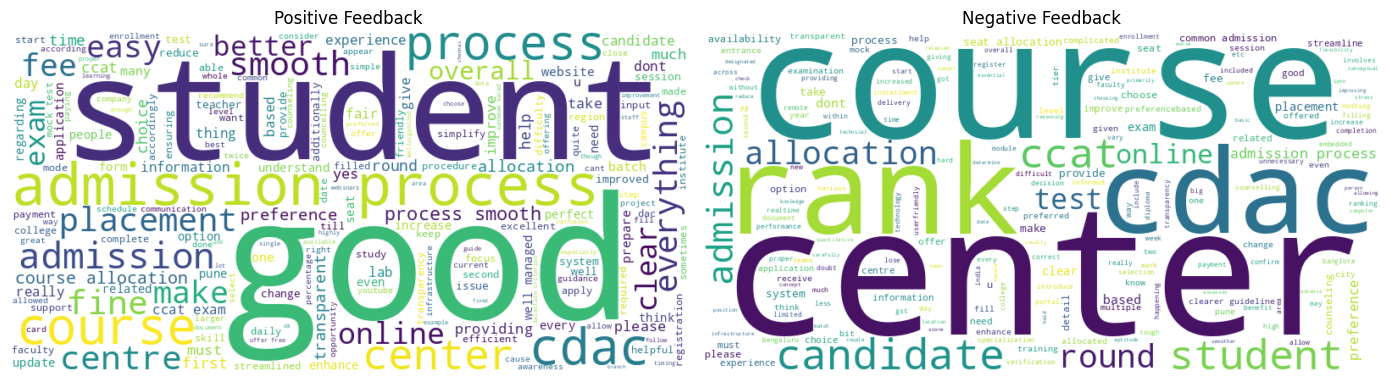

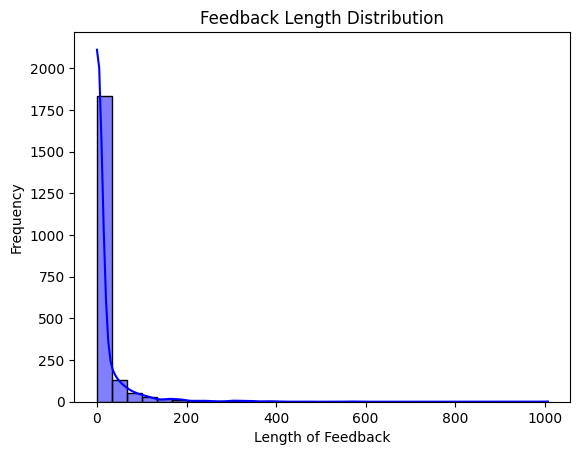

<ipython-input-249-b2e890723b2f>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


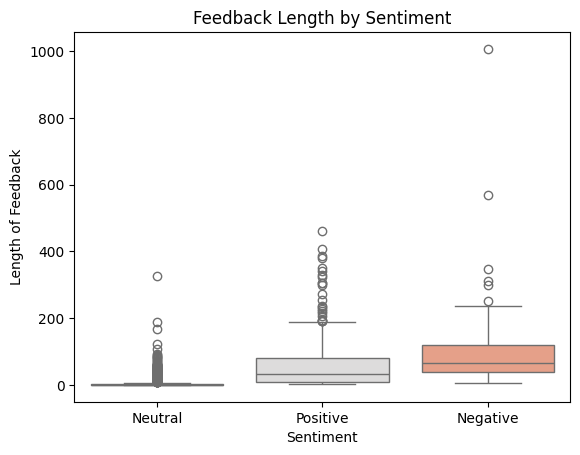

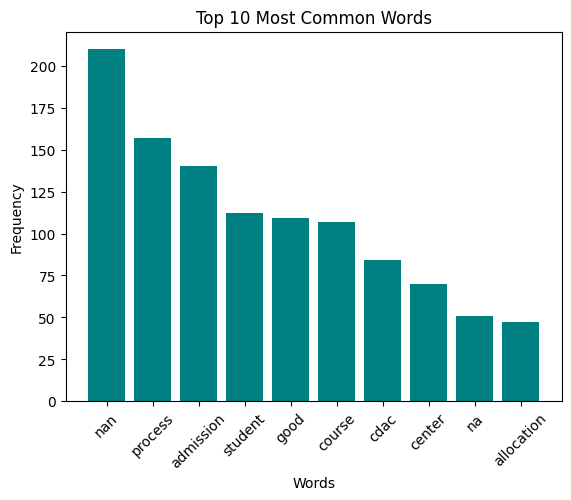

In [249]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Inputs'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Inputs', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Offering Column : What is your opinion about offering C-DAC courses in online mode?**

    Offering Cleaned_Feedback
0  Very good             good
1  Very good             good
2       Okay             okay
3       Okay             okay
4        Bad              bad
Sentiment
Positive    1087
Neutral     1013
Negative       6
Name: count, dtype: int64


<ipython-input-248-71c935dc6a7f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


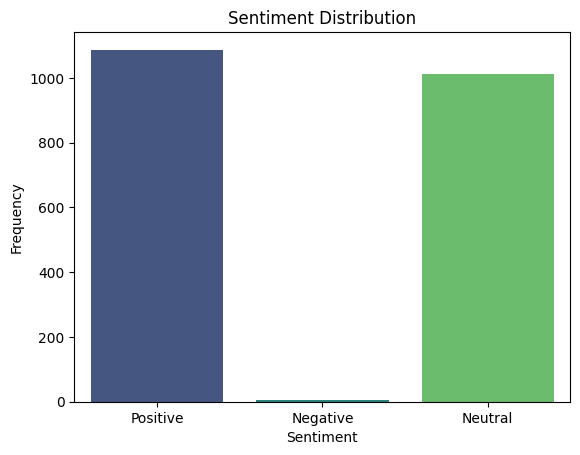

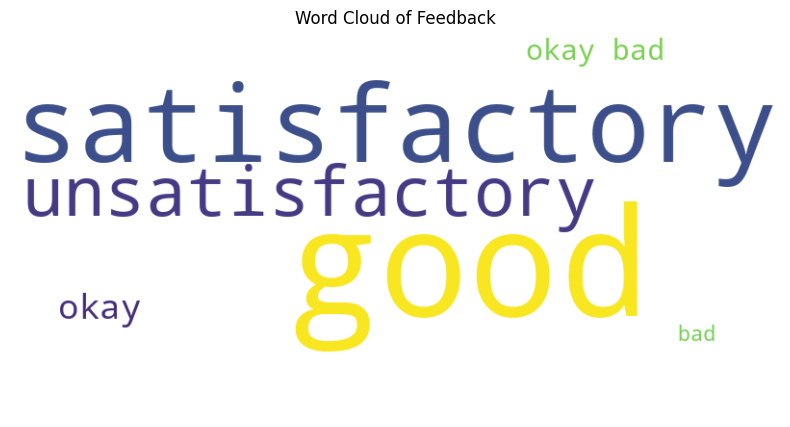

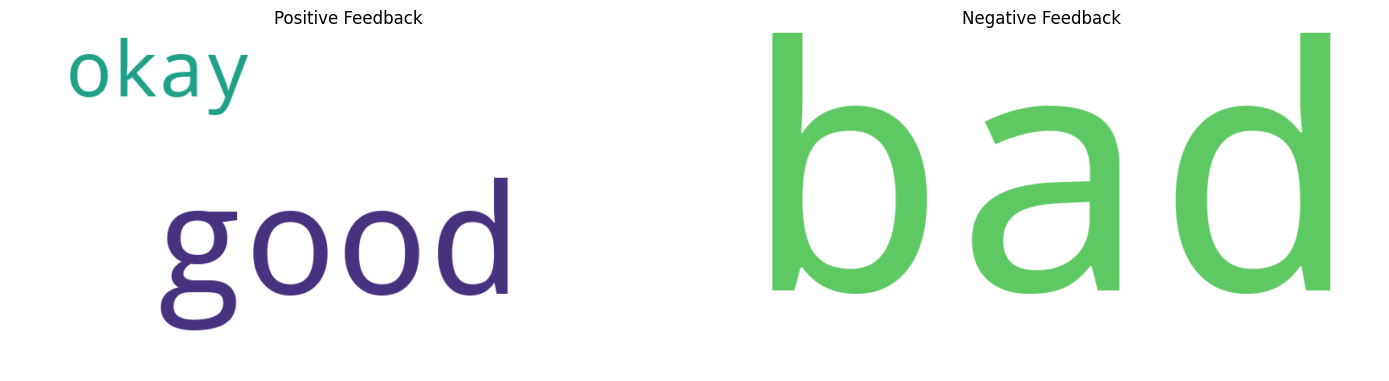

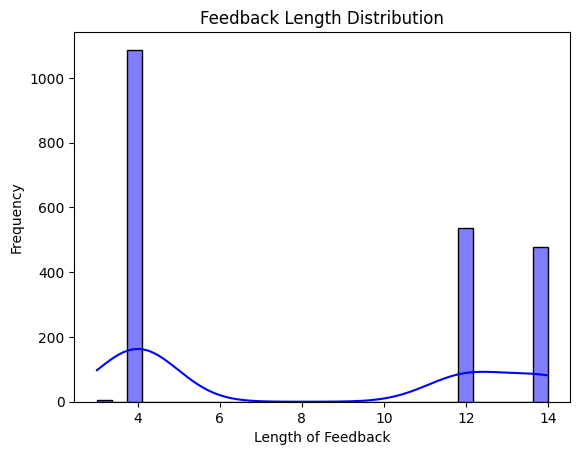

<ipython-input-248-71c935dc6a7f>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


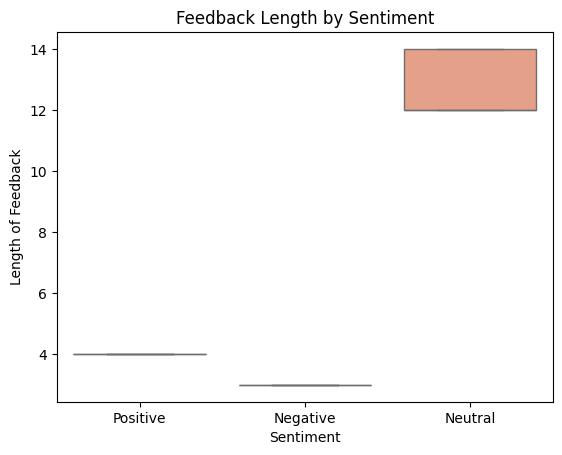

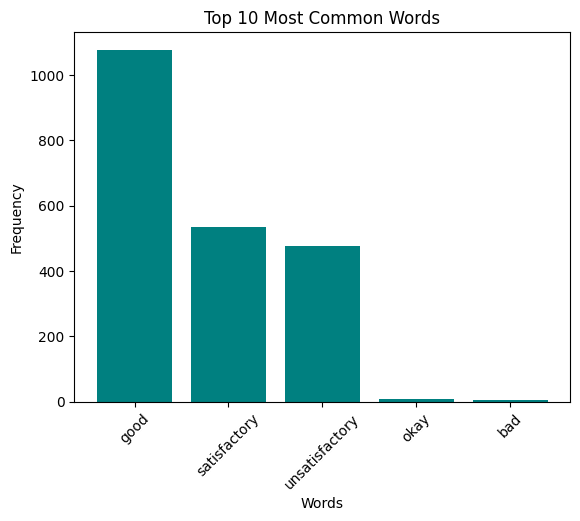

In [248]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Offering'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Offering', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**SupportFuture Column : Would you like to support future batches of C-DAC? **

                                       SupportFuture  \
0  By guiding them and helping them with every po...   
1  By guiding them about the courser and the outc...   
2                                                 No   
3                                                Yes   
4                                                 No   

                     Cleaned_Feedback  
0  guiding helping every possible way  
1             guiding courser outcome  
2                                      
3                                 yes  
4                                      
Sentiment
Neutral     1694
Positive     358
Negative      54
Name: count, dtype: int64


<ipython-input-246-22c882f7e22f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


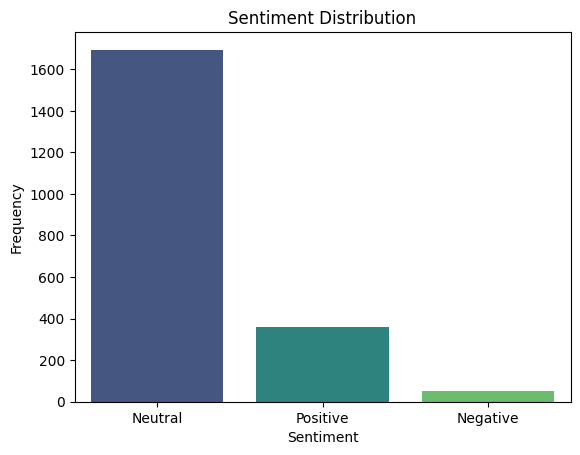

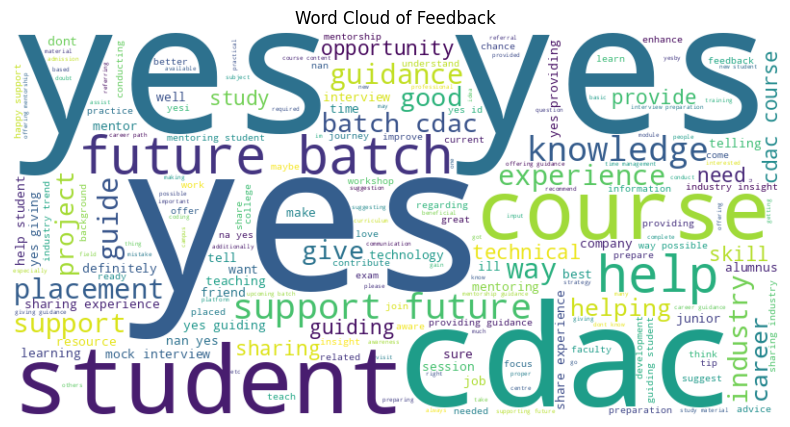

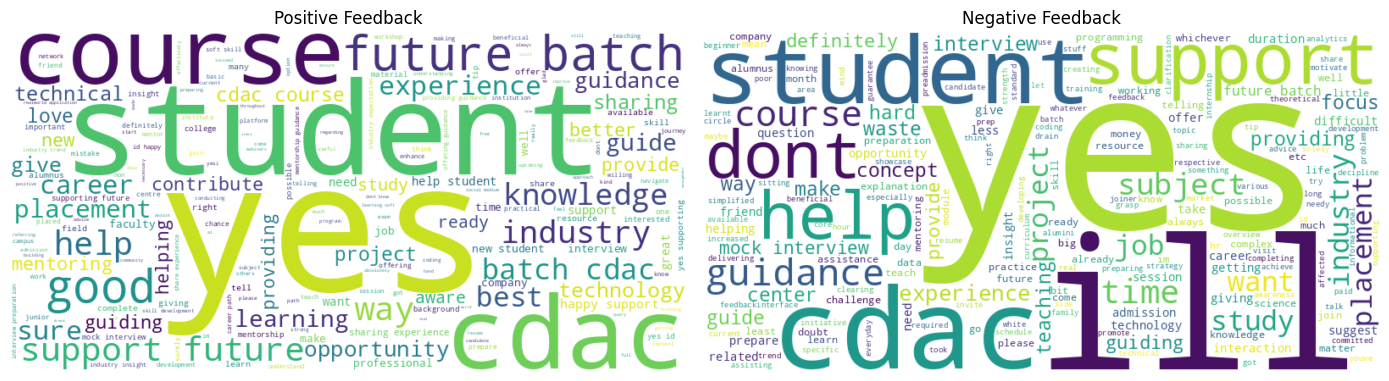

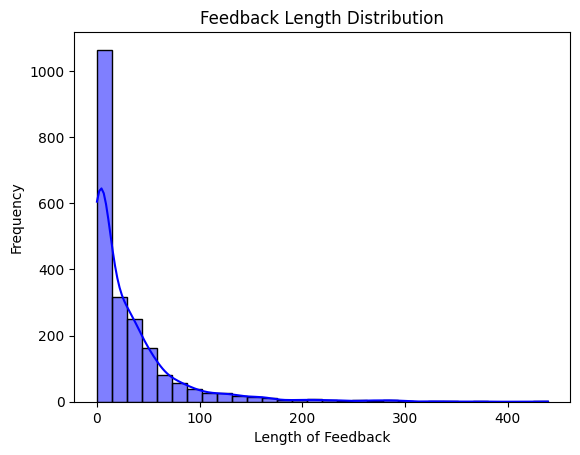

<ipython-input-246-22c882f7e22f>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


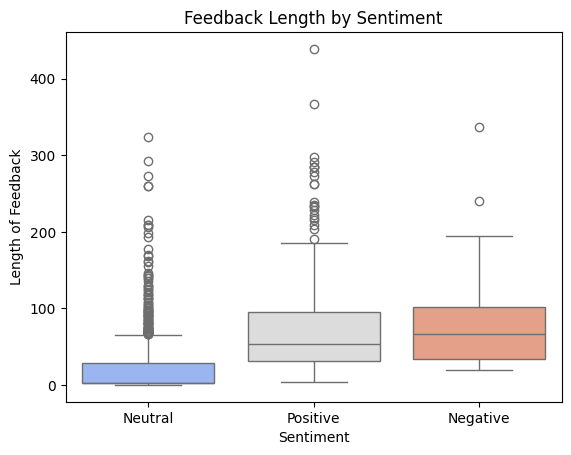

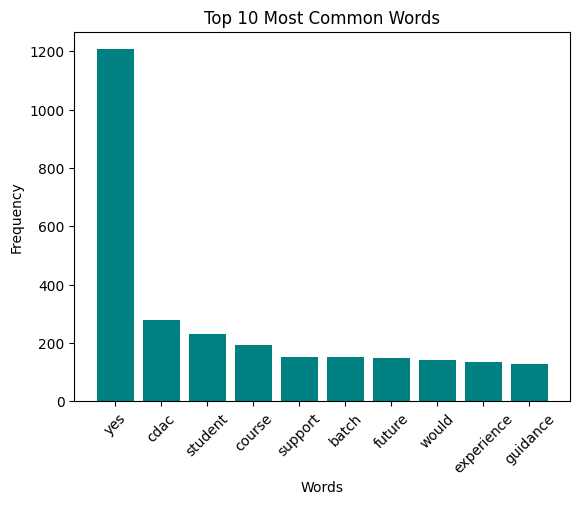

In [246]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['SupportFuture'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['SupportFuture', 'Cleaned_Feedback']].head())

# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Feedback Column : Any other feedback related to the C-DAC courses**

In [247]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Feedback'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Feedback', 'Cleaned_Feedback']].head())




                                    Feedback                  Cleaned_Feedback
0                                         No                                  
1                                         No                                  
2  Please offer this course in offline mode.  please offer course offline mode
3                                         No                                  
4                                         No                                  


**Sentiment** **Analysis**

In [231]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())


Sentiment
Neutral     1624
Positive     398
Negative      84
Name: count, dtype: int64


**Visualization**

<ipython-input-232-b10891ae357f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


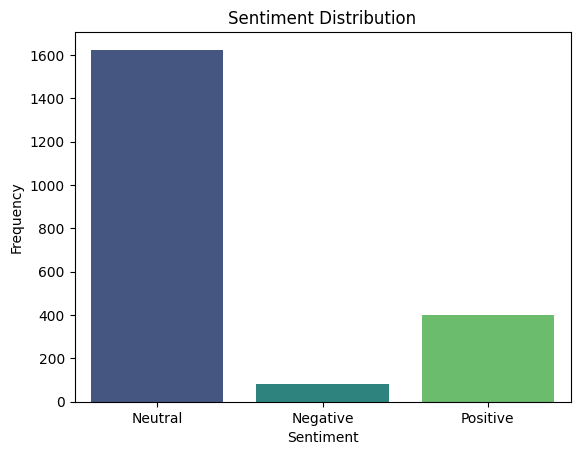

In [232]:
# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


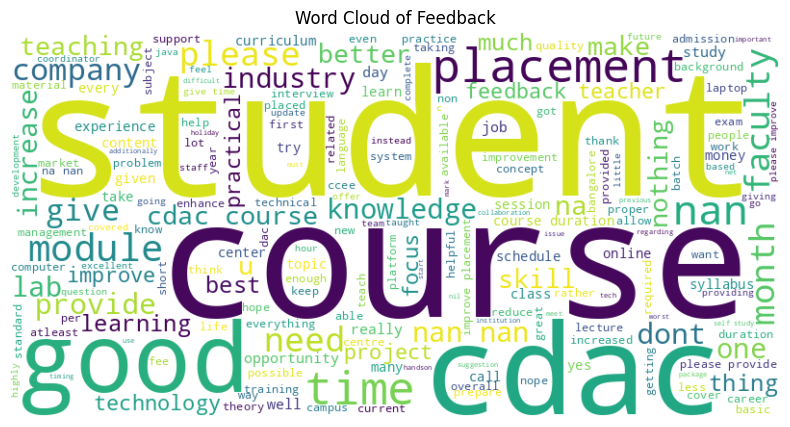

In [233]:
# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()


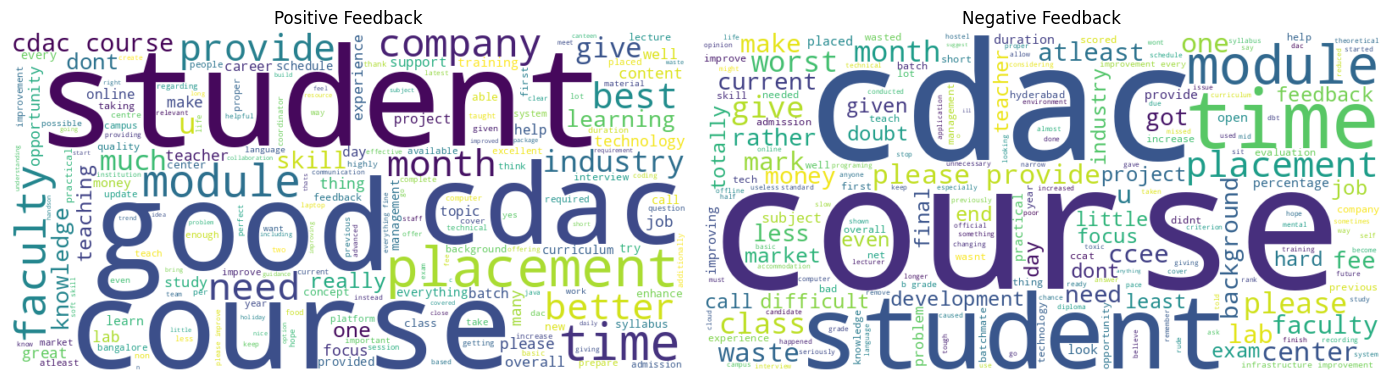

In [234]:
# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()


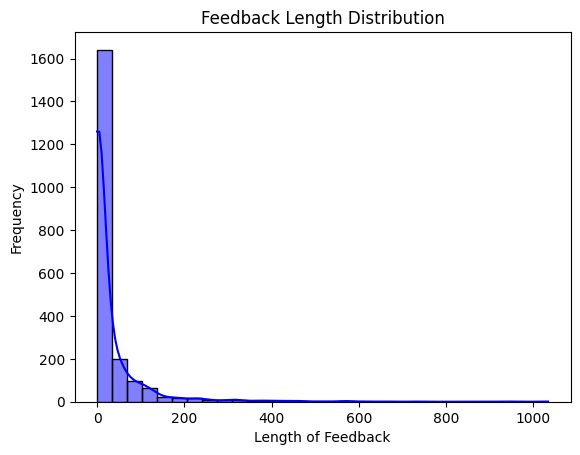

<ipython-input-235-aed458c31bc5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


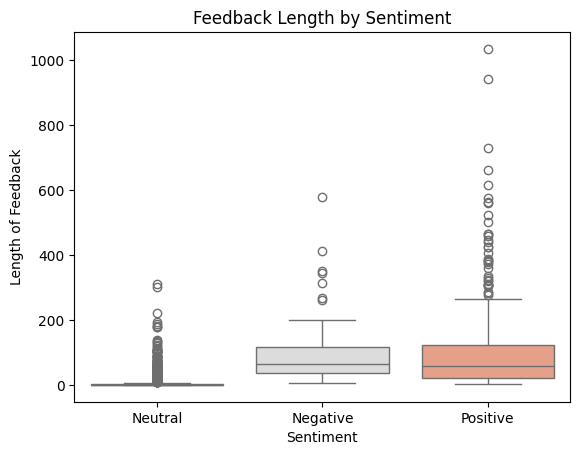

In [235]:
# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()


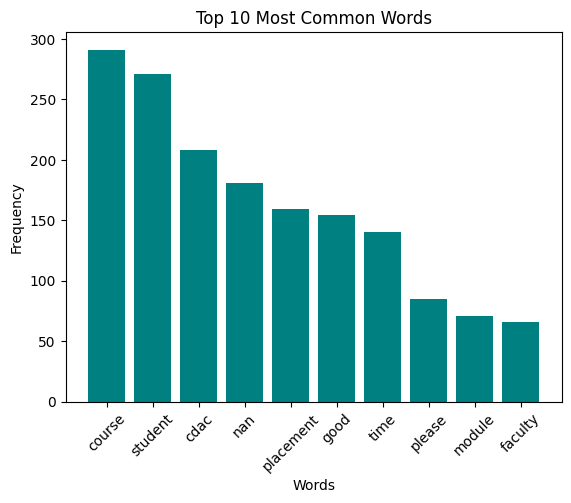

In [236]:
# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## **## Aniket's File : Reasons.csv**

In [255]:
# Read and drop null values
data = pd.read_csv('/content/Reasons1.csv')
data.head(2)

Username   Batch  \
0        kaushal.comp@gmail.com  Aug-24   
1  aniketrudraksh2002@gmail.com  Aug-24   

                                             Reasons  
0  Arranging fund problem/ not able to get the ed...  
1                                                  .

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  643 non-null    object
 1   Batch     643 non-null    object
 2   Reasons   594 non-null    object
dtypes: object(3)
memory usage: 15.2+ KB


In [258]:
data.columns

Index(['Username', 'Batch', 'Reasons'], dtype='object')

In [259]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Reasons'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Reasons', 'Cleaned_Feedback']].head())

                                             Reasons  \
0  Arranging fund problem/ not able to get the ed...   
1                                                  .   
2                         I got a call from Infosys    
3                                                 No   
4  Due to low funds. I didn't able to taks admiss...   

                                 Cleaned_Feedback  
0  arranging fund problem able get education loan  
1                                                  
2                                got call infosys  
3                                                  
4          due low fund didnt able taks admission  


In [260]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

Sentiment
Neutral     340
Positive    163
Negative    140
Name: count, dtype: int64


<ipython-input-261-b10891ae357f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


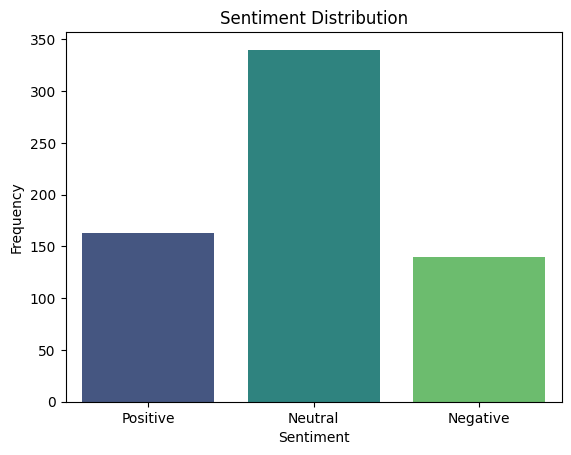

In [261]:

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

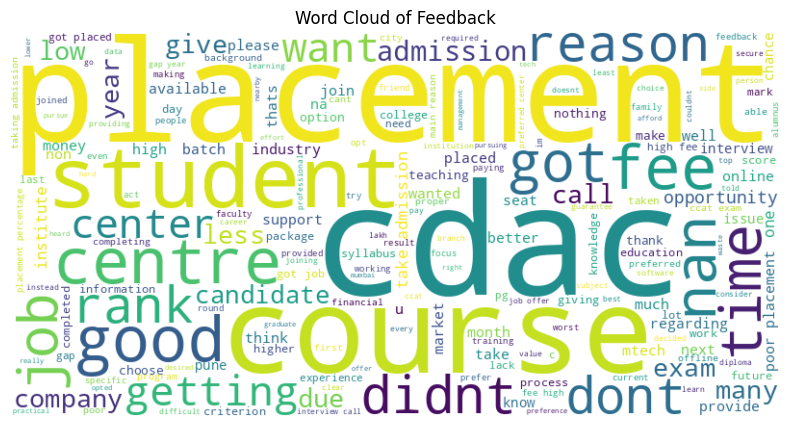

In [262]:


# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

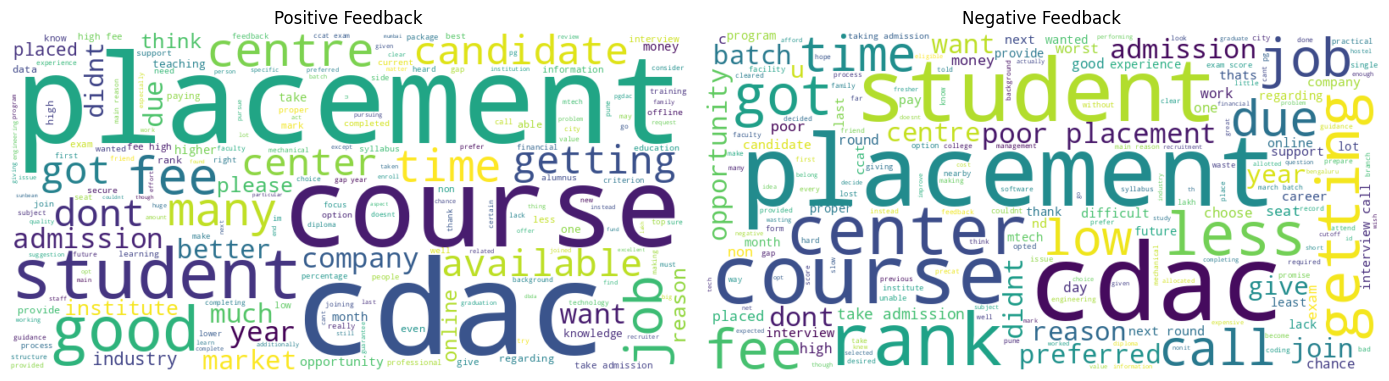

In [263]:
# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

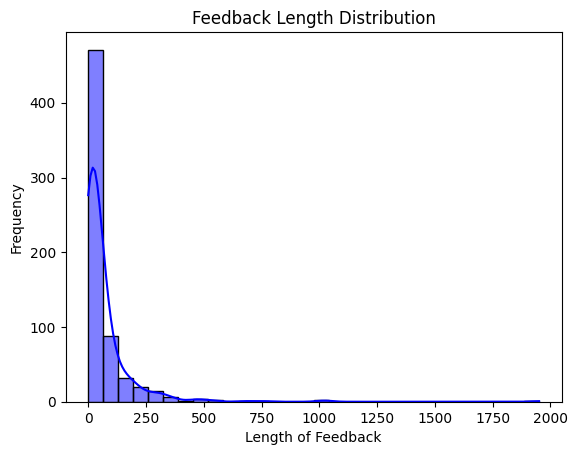

In [264]:
# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

<ipython-input-265-9dae8a5b7b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


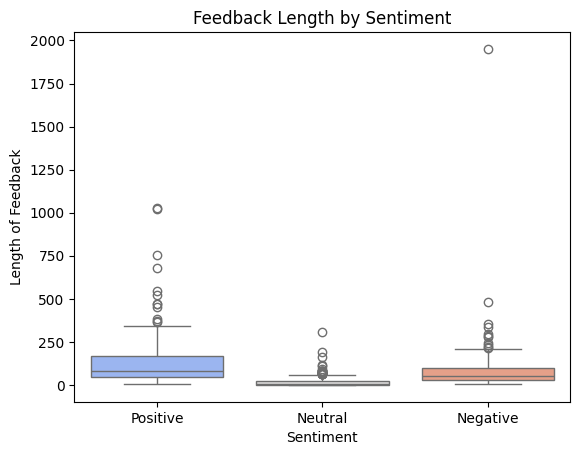

In [265]:

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

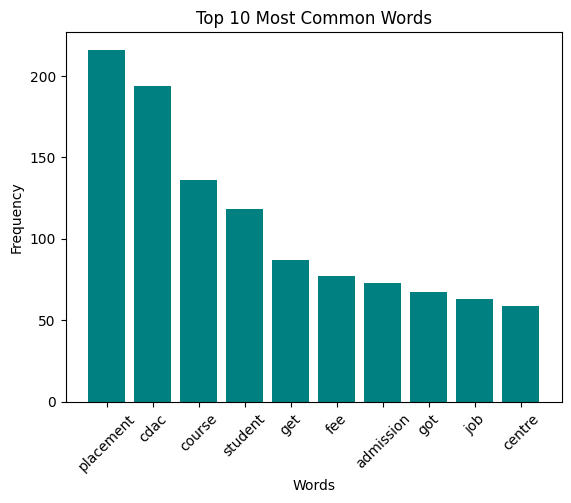

In [266]:

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()